In [1]:
import pandas as pd

In [2]:
real_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
septic_data = pd.read_csv("/content/sample_data/Swapnil_Extra_Annotation.csv", header=None, skipinitialspace=True , encoding='utf-8') 
real_data[1] = real_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
news_data= pd.concat([real_data, septic_data], axis=0)
septic_data = pd.read_csv("/content/sample_data/Prasant_Extra_Annotation.csv", header=None, skipinitialspace=True , encoding='utf-8') 
news_data= pd.concat([news_data, septic_data], axis=0)
septic_data = pd.read_csv("/content/sample_data/Kunal_Extra_Annotation.csv", header=None, skipinitialspace=True , encoding='utf-8') 
news_data= pd.concat([news_data, septic_data], axis=0)
septic_data = pd.read_csv("/content/sample_data/ExtraCovidAnnotation.csv", header=None, skipinitialspace=True , encoding='utf-8') 
news_data= pd.concat([news_data, septic_data], axis=0)
septic_data = pd.read_csv("/content/sample_data/CovidData.csv", header=None, skipinitialspace=True , encoding='utf-8') 
news_data= pd.concat([news_data, septic_data], axis=0)
news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
print(news_data.head(20))
labels=news_data[1]
labels.head()     
X = news_data[0]
Y=news_data[1]
print(('Xshape:', X.shape))
print(('Yshape:', Y.shape))

                                                    0  1
0   The political predicament also appears to be t...  0
1   The CM had planned to meet the duo when he com...  0
2   He’s now scheduled to visit New Delhi on Thurs...  0
3   “If he fails to do so, he would face open rebe...  0
4   “Further delay is likely. Despite threats from...  0
5   “The party should make a concerted effort to i...  0
6   Taking serious note of allegations pertaining ...  0
7   Panchayat raj and mining minister Pedireddy Ra...  0
8   Sources said the party legislator reportedly s...  0
9   The legislator is his report said that large q...  0
10  The legislator claimed that the gravel was ext...  0
11  “The Mandal Parishad Development Officers (MPD...  0
12  He submitted also certain documents to substan...  0
13  “The MPDOs requisitioned for supply of about 8...  0
14  He said that massive illegal mining had not on...  0
15  The legislator said that field level officials...  0
16  Curiously, an MPDO, who is 

In [3]:
!pip install contractions

In [4]:
#importing required libraries
import nltk
import inflect
import contractions
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
# First function is used to denoise text
def denoise_text(text):
    # Strip html if any. For ex. removing <html>, <p> tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    # Replace contractions in the text. For ex. didn't -> did not
    text = contractions.fix(text)
    return text
# Check the function 
sample_text = "<p>he didn't say anything </br> about what's gonna <html> happen in the climax"
denoise_text(sample_text)

'he did not say anything  about what is going to  happen in the climax'

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# Text normalization includes many steps.
# Each function below serves a step.
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words
def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas
def normalize_text(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    #words = stem_words(words)
    words = lemmatize_verbs(words)
    return words
# Testing the functions
print("remove_non_ascii results: ", remove_non_ascii(['h', 'ॐ', '©', '1']))
print("to_lowercase results: ", to_lowercase(['HELLO', 'hiDDen', 'wanT', 'GOING']))
print("remove_punctuation results: ", remove_punctuation(['hello!!', 'how?', 'done,']))
print("replace_numbers results: ", replace_numbers(['1', '2', '3']))
print("remove_stopwords results: ", remove_stopwords(['this', 'and', 'amazing']))
print("stem_words results: ", stem_words(['beautiful', 'flying', 'waited']))
print("lemmatize_verbs results: ", lemmatize_verbs(['hidden', 'walking', 'ran']))
print("normalize_text results: ", normalize_text(['hidden', 'in', 'the', 'CAVES', 'he', 'WAited', '2', 'ॐ', 'hours!!']))

remove_non_ascii results:  ['h', '', '', '1']
to_lowercase results:  ['hello', 'hidden', 'want', 'going']
remove_punctuation results:  ['hello', 'how', 'done']
replace_numbers results:  ['one', 'two', 'three']
remove_stopwords results:  ['amazing']
stem_words results:  ['beauty', 'fly', 'wait']
lemmatize_verbs results:  ['hide', 'walk', 'run']
normalize_text results:  ['hide', 'cave', 'wait', 'two', 'hours']


In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Tokenize tweet into words
def tokenize(text):
    return nltk.word_tokenize(text)
# check the function
sample_text = 'he did not say anything  about what is going to  happen'
print("tokenize results :", tokenize(sample_text))

tokenize results : ['he', 'did', 'not', 'say', 'anything', 'about', 'what', 'is', 'going', 'to', 'happen']


In [9]:
print(type(news_data[1]))

<class 'pandas.core.series.Series'>


In [10]:
def text_prepare(text):
    text = denoise_text(text)
    text = ' '.join([x for x in normalize_text(tokenize(text))])
    return text
news_data[0] = [text_prepare(x) for x in news_data[0]]
# le = LabelEncoder()
# news_data[1] = le.fit_transform(news_data[1])
# news_data.head()

In [11]:
print(news_data)

                                                      0  1
0     political predicament also appear take toll ye...  0
1       cm plan meet duo complete one year office avail  0
2     schedule visit new delhi thursday expect meet ...  0
3     fail would face open rebellion senior mlas unh...  0
4     delay likely despite threats new legislators p...  0
...                                                 ... ..
2877  talk dad tell go gym ever morning work go oh w...  0
2878  house heat twenty-three celsius new coronaviru...  0
2879            newborn baby call boil egg treat corona  0
2880  indian government issue guideline monitor citi...  0
2881  prince charles test positive covid19 meet boll...  0

[7289 rows x 2 columns]


In [12]:
from keras.layers import Dropout, Dense, Embedding, LSTM, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle
import numpy as np
import pickle
import matplotlib.pyplot as plt
import warnings
import logging
logging.basicConfig(level=logging.INFO)

In [13]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-05-11 16:27:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-05-11 16:27:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-05-11 16:27:00--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [14]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [15]:
!ls
!pwd

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
glove.6B.200d.txt  glove.6B.50d.txt   sample_data
/content


In [16]:
def prepare_model_input(X_train, X_test,MAX_NB_WORDS=75000,MAX_SEQUENCE_LENGTH=100):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    # pickle.dump(tokenizer, open('text_tokenizer.pkl', 'wb'))
    # Uncomment above line to save the tokenizer as .pkl file 
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train_Glove = text[0:len(X_train), ]
    X_test_Glove = text[len(X_train):, ]
    embeddings_dict = {}
    f = open("glove.6B.50d.txt", encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_dict[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_dict))
    return (X_train_Glove, X_test_Glove, word_index, embeddings_dict)
## Check function
x_train_sample = ["Lorem Ipsum is simply dummy text of the printing and typesetting industry", "It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout"]
x_test_sample = ["I’m creating a macro and need some text for testing purposes", "I’m designing a document and don’t want to get bogged down in what the text actually says"]
X_train_Glove_s, X_test_Glove_s, word_index_s, embeddings_dict_s = prepare_model_input(x_train_sample, x_test_sample, 100, 20)
print("\n X_train_Glove_s \n ", X_train_Glove_s)
print("\n X_test_Glove_s \n ", X_test_Glove_s)
print("\n Word index of the word testing is : ", word_index_s["testing"])
print("\n Embedding for thw word want \n \n", embeddings_dict_s["want"])

Found 51 unique tokens.
(4, 20)
Total 400000 word vectors.

 X_train_Glove_s 
  [[ 0  0  0  0  0  0  0  0  8  9  5 10 11  2  6  3 12  4 13 14]
 [17 18 19  1 20 21 22 23 24  3 25 26  6  1 27 28 29 30 31 32]]

 X_test_Glove_s 
  [[ 0  0  0  0  0  0  0  0  0  7 33  1 34  4 35 36  2 37 38 39]
 [ 0  0  0  7 40  1 41  4 42 43 44 45 46 47 48 49  3  2 50 51]]

 Word index of the word testing is :  38

 Embedding for thw word want 
 
 [ 0.13627  -0.054478  0.3703   -0.41574   0.60568  -0.42729  -0.50151
  0.35923  -0.49154   0.21827  -0.15193   0.52536  -0.24206   0.023875
  0.8225    1.089     0.98825  -0.17803   0.77806  -1.0647   -0.28742
  0.50458   0.21612   0.65681   0.34295  -2.1084   -0.82557  -0.31966
  0.87567  -1.0679    3.3802    1.2084   -1.272    -0.15921  -0.25237
 -0.2696   -0.18756  -0.35523   0.084172 -0.56539  -0.24081   0.15926
  0.3287    0.54591   0.29897   0.18948  -0.57113   0.17399  -0.19338
  0.51921 ]


In [17]:
def build_bilstm(word_index, embeddings_dict, nclasses,  MAX_SEQUENCE_LENGTH=100, EMBEDDING_DIM=50, dropout=0.5, hidden_layer = 3, lstm_node = 32):
    # Initialize a sequebtial model
    model = Sequential()
    # Make the embedding matrix using the embedding_dict
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) != len(embedding_vector):
                print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                      "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
            
    # Add embedding layer
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    # Add hidden layers 
    for i in range(0,hidden_layer):
        # Add a bidirectional lstm layer
        model.add(Bidirectional(LSTM(lstm_node, return_sequences=True, recurrent_dropout=0.2)))
        # Add a dropout layer after each lstm layer
        model.add(Dropout(dropout))
    model.add(Bidirectional(LSTM(lstm_node, recurrent_dropout=0.2)))
    model.add(Dropout(dropout))
    # Add the fully connected layer with 256 nurons and relu activation
    model.add(Dense(256, activation='relu'))
    # Add the output layer with softmax activation since we have 2 classes
    model.add(Dense(nclasses, activation='softmax'))
    # Compile the model using sparse_categorical_crossentropy
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
    return model

In [18]:
X = news_data[0]
y = news_data[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=7)
print("Preparing model input ...")
X_train_Glove, X_test_Glove, word_index, embeddings_dict = prepare_model_input(X_train,X_test)
print("Done!")
print("Building Model!")
model = build_bilstm(word_index, embeddings_dict, 2)
model.summary()

Preparing model input ...
Found 10631 unique tokens.
(7289, 100)
Total 400000 word vectors.
Done!
Building Model!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           531600    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 64)          21248     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 64)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 64)          24832     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 100, 64)           0         
        

In [19]:
def get_eval_report(labels, preds):
    mcc = matthews_corrcoef(labels, preds)
    tn, fp, fn, tp = confusion_matrix(labels, preds).ravel()
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1 = (2*(precision*recall))/(precision+recall)
    return {
        "mcc": mcc,
        "true positive": tp,
        "true negative": tn,
        "false positive": fp,
        "false negative": fn,
        "pricision" : precision,
        "recall" : recall,
        "F1" : f1,
        "accuracy": (tp+tn)/(tp+tn+fp+fn)
    }
def compute_metrics(labels, preds):
    assert len(preds) == len(labels)
    return get_eval_report(labels, preds)
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


In [20]:
history = model.fit(X_train_Glove, np.asarray(y_train).astype(np.float32),
                           validation_data=(X_test_Glove,np.asarray(y_test).astype(np.float32)),
                           epochs=12,
                           batch_size=128,
                           verbose=1)

Epoch 1/12
55/55 [==============================] - 73s 974ms/step - loss: 0.6592 - accuracy: 0.5953 - val_loss: 0.6299 - val_accuracy: 0.6247
Epoch 2/12
55/55 [==============================] - 52s 938ms/step - loss: 0.5622 - accuracy: 0.7227 - val_loss: 0.4974 - val_accuracy: 0.7836
Epoch 3/12
55/55 [==============================] - 52s 939ms/step - loss: 0.4620 - accuracy: 0.7959 - val_loss: 0.4423 - val_accuracy: 0.8219
Epoch 4/12
55/55 [==============================] - 52s 951ms/step - loss: 0.3598 - accuracy: 0.8511 - val_loss: 0.3774 - val_accuracy: 0.8521
Epoch 5/12
55/55 [==============================] - 52s 941ms/step - loss: 0.2866 - accuracy: 0.8876 - val_loss: 0.3442 - val_accuracy: 0.8438
Epoch 6/12
55/55 [==============================] - 55s 996ms/step - loss: 0.2157 - accuracy: 0.9204 - val_loss: 0.4314 - val_accuracy: 0.8438
Epoch 7/12
55/55 [==============================] - 52s 940ms/step - loss: 0.1675 - accuracy: 0.9395 - val_loss: 0.4601 - val_accuracy: 0.8384

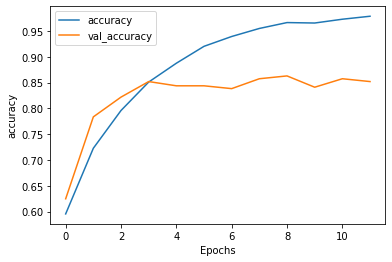

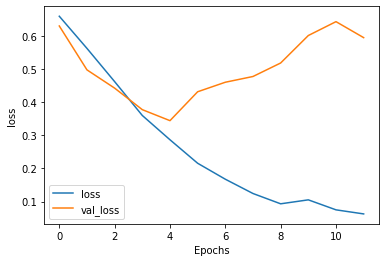

In [21]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [22]:
print("\n Evaluating Model ... \n")
predicted = model.predict(X_test_Glove)
predicted = np.argmax(predicted,axis=1)
print(type(predicted))
print(type(y_test))
y_test1=y_test.to_numpy(dtype ='float32')
predicted=predicted.astype('float32')
predicted=predicted.round()
# predicted=predicted.flatten()
print(predicted)
print(y_test1)
print(metrics.classification_report(y_test1, predicted))
print("\n")
logger = logging.getLogger("logger")
result = compute_metrics(y_test1, predicted)
for key in (result.keys()):
    logger.info("  %s = %s", key, str(result[key]))


 Evaluating Model ... 



INFO:logger:  mcc = 0.7056873116463278
INFO:logger:  true positive = 150
INFO:logger:  true negative = 161
INFO:logger:  false positive = 21
INFO:logger:  false negative = 33
INFO:logger:  pricision = 0.8771929824561403
INFO:logger:  recall = 0.819672131147541
INFO:logger:  F1 = 0.8474576271186439
INFO:logger:  accuracy = 0.852054794520548


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
[1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 

In [23]:
#To save the tokenizer follow instructions in prepare_model_input function i.e. uncomment this line #pickle.dump(tokenizer, open('text_tokenizer.pkl', 'wb')) in that function
# To save the model run this line
# pickle.dump(model, open('model.pkl', 'wb'))
# you are ready for deployment!

In [24]:
!pip install pydot
!pip install graphviz

In [25]:
from tensorflow.keras.utils import plot_model

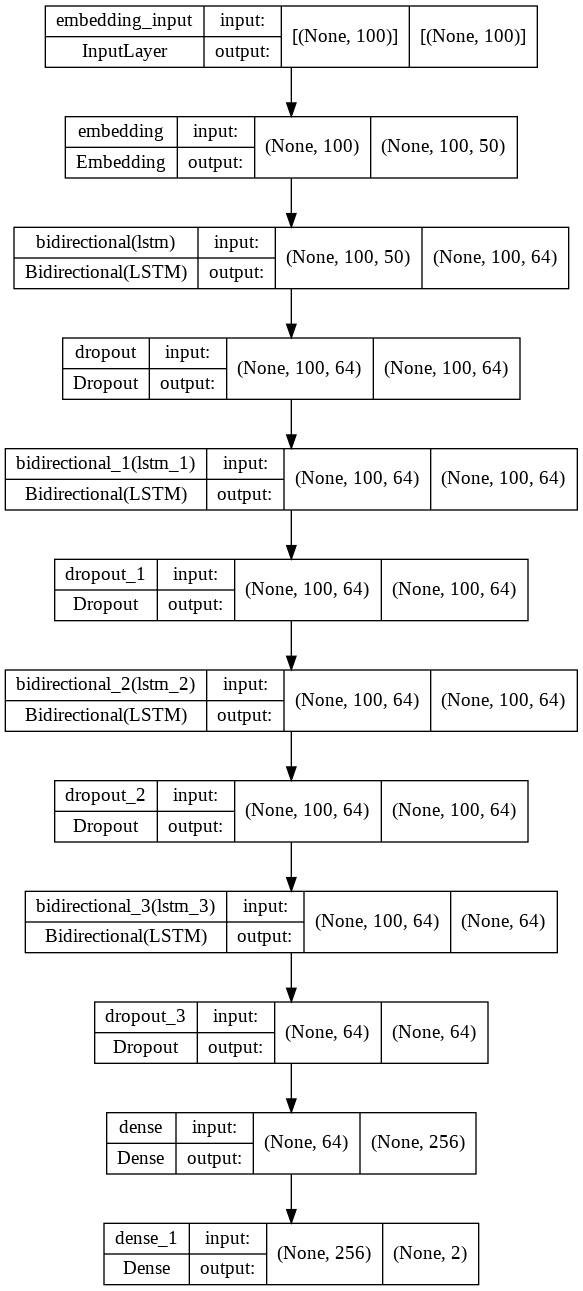

In [26]:
plot_model(model, to_file='model121.png', show_shapes=True, show_layer_names=True)

In [27]:
##Taken help from-> https://medium.com/analytics-vidhya/building-a-text-classification-model-using-bilstm-c0548ace26f2

In [28]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import itertools
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [37]:
print(type(predicted))
print(predicted)
print(type(y_test1))
print(y_test1)

<class 'numpy.ndarray'>
[1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0.

[[161  21]
 [ 33 150]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       182
           1       0.88      0.82      0.85       183

    accuracy                           0.85       365
   macro avg       0.85      0.85      0.85       365
weighted avg       0.85      0.85      0.85       365

Accuracy :  0.852054794520548
Precison :  0.8541899151825045
Recall :  0.852054794520548
F1 :  0.8522015126291193


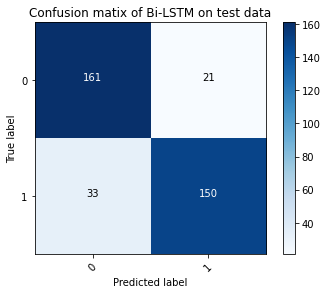

In [38]:
print_metrices( predicted.astype(int), y_test1.astype(int))
plot_confusion_matrix(confusion_matrix(y_test1.astype(int),predicted.astype(int)),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of Bi-LSTM on test data')